### Md. Asifur Rahman

### ID: 18.02.04.114

In [170]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

import sklearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm

### Dataset Loading

In [32]:
df_fake = pd.read_csv("Fake-1K.csv")

In [33]:
df_fake

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0
...,...,...,...,...,...,...,...
1294,1303,bengalbeats.com,2019-03-31T21:34:42+00:00,Miscellaneous,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0
1295,1304,bengaliviralnews.com,2018-01-16T15:36:12+00:00,Miscellaneous,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0
1296,1305,channeldhaka.news,2018-12-03T18:09:08+00:00,Crime,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0
1297,1306,earki.com,"১৭:৩৬, জানুয়ারি ০৭, ২০১৯",Miscellaneous,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0


In [34]:
df_true = pd.read_csv("Authentic-48K.csv")

In [35]:
df_true

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1
...,...,...,...,...,...,...,...
48673,61776,banglanews24.com,2018-10-11 16:39:23,Sports,"এনসিএলে তিতলির প্রভাব, সব ম্যাচ ড্র",প্রথমে বাংলাদেশের কাছ দিয়ে যাওয়ার কথা থাকলেও ঘ...,1
48674,61777,banglanews24.com,2018-10-11 16:39:27,International,"কর্ম-বসবাসে সেরা সিঙ্গাপুর, আয়ে সুইজারল্যান্ড",উন্নত জীবনযাপনের জন্য অনেকেই বিদেশে পাড়ি দেন। ...,1
48675,61778,banglanews24.com,2018-10-11 16:39:30,Politics,জয়পুরহাটে জামায়াতের ১৯ নেতাকর্মী আটক,জয়পুরহাট: সরকার বিরোধী গোপন বৈঠকের সময় জয়পুরহা...,1
48676,61779,banglanews24.com,2018-10-11 16:39:32,National,ভ্যানগার্ড পোশাক কারখানাকে জরিমানা,চট্টগ্রাম: পরিবেশ দূষণের দায়ে নগরের আগ্রাবাদ এ...,1


### Concating Authentic and Fake News

In [36]:
merge_data = pd.concat([df_true, df_fake])
merge_data

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1
...,...,...,...,...,...,...,...
1294,1303,bengalbeats.com,2019-03-31T21:34:42+00:00,Miscellaneous,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0
1295,1304,bengaliviralnews.com,2018-01-16T15:36:12+00:00,Miscellaneous,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0
1296,1305,channeldhaka.news,2018-12-03T18:09:08+00:00,Crime,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0
1297,1306,earki.com,"১৭:৩৬, জানুয়ারি ০৭, ২০১৯",Miscellaneous,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0


In [37]:
merge_data

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1
...,...,...,...,...,...,...,...
1294,1303,bengalbeats.com,2019-03-31T21:34:42+00:00,Miscellaneous,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0
1295,1304,bengaliviralnews.com,2018-01-16T15:36:12+00:00,Miscellaneous,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0
1296,1305,channeldhaka.news,2018-12-03T18:09:08+00:00,Crime,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0
1297,1306,earki.com,"১৭:৩৬, জানুয়ারি ০৭, ২০১৯",Miscellaneous,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0


### Checking for Null values

In [38]:
merge_data.isnull().sum()

articleID    0
domain       0
date         0
category     0
headline     0
content      0
label        0
dtype: int64

In [39]:
merge_data.shape

(49977, 7)

### Checking the labels of the data

In [40]:
print("Total news:",len(merge_data),
      "\nTotal Authentic news:",len(merge_data[merge_data.label ==1]),
      "\nTotal Fake news:",len(merge_data[merge_data.label ==0]))

Total news: 49977 
Total Authentic news: 48678 
Total Fake news: 1299


### Ploting the Dataset Distribution graph

Text(0.5, 1.1, 'Dataset Distribution')

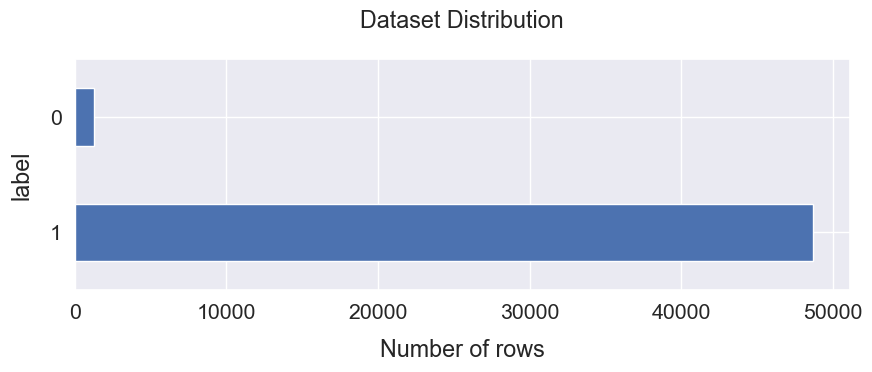

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
merge_data['label'].value_counts().plot(kind='barh', figsize=(10,3))
plt.xlabel("Number of rows",labelpad=12)
plt.ylabel("label",labelpad=12)
plt.title("Dataset Distribution",y=1.10)

In [42]:
merge_data

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1
...,...,...,...,...,...,...,...
1294,1303,bengalbeats.com,2019-03-31T21:34:42+00:00,Miscellaneous,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0
1295,1304,bengaliviralnews.com,2018-01-16T15:36:12+00:00,Miscellaneous,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0
1296,1305,channeldhaka.news,2018-12-03T18:09:08+00:00,Crime,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0
1297,1306,earki.com,"১৭:৩৬, জানুয়ারি ০৭, ২০১৯",Miscellaneous,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0


### Droping the unnecessary columns

In [43]:
merge_data=merge_data.drop('articleID', axis=1)
merge_data=merge_data.drop('domain', axis=1)
merge_data=merge_data.drop('date', axis=1)
merge_data=merge_data.drop('category', axis=1)

In [44]:
merge_data

,headline,content,label
0,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1
...,...,...,...
1294,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0
1295,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0
1296,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0
1297,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0


### Creating a new feature named 'content1'. Where 'headline' and 'content' feature's data is kept after concating

In [45]:
merge_data['content1'] = merge_data['headline']+' '+merge_data['content']

In [46]:
print(merge_data['content1'])

0       হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শো...
1       মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারি...
2       প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...
3       মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...
4       টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু মাদ...
                              ...                        
1294    রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...
1295    IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...
1296    শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু! শাও...
1297    ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...
1298    মাঝ আকাশে পর্ন দেখার অভিযোগে পাইলট আটক! বিমান ...
Name: content1, Length: 49977, dtype: object


### Defining the feature variable & the target variable

In [47]:
X = merge_data.drop(columns='label', axis=1)
Y = merge_data['label']

In [48]:
print(X)
print(Y)

                                               headline  \
0      হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ   
1       মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ   
2     প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...   
3     মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...   
4            টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু   
...                                                 ...   
1294  রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...   
1295  IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...   
1296         শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!   
1297  ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...   
1298            মাঝ আকাশে পর্ন দেখার অভিযোগে পাইলট আটক!   

                                                content  \
0     গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...   
1     বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...   
2     নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...   
3     সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...

### Removing unnecessary punctuations and special characters

In [49]:
import re
def process_content1(content1):
   content1=re.sub('[^\u0980-\u09FF]',' ',str(content1)) 
   return content1

### Data cleaning

In [50]:
merge_data['cleaned']=merge_data['content1'].apply(process_content1)

sample_data=[0,1,100,102,128,1005,4002,2004,3005,5001]
for i in sample_data:
           print('Original:\n',merge_data.content1[i],'\nCleaned:\n',
                 merge_data.cleaned[i],'\n','Sentiment:---',merge_data.label[i],'\n')

Original:
 0    হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শো...
0    মুরগির হামলায় শেয়াল নিহত বাংলায় একটা প্রবাদ আছ...
Name: content1, dtype: object 
Cleaned:
 0    হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত  ৬ জনকে শো...
0    মুরগির হামলায় শেয়াল নিহত বাংলায় একটা প্রবাদ আছ...
Name: cleaned, dtype: object 
 Sentiment:--- 0    1
0    0
Name: label, dtype: int64 

Original:
 1    মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারি...
1    বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম BTV থে...
Name: content1, dtype: object 
Cleaned:
 1    মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারি...
1    বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম     থে...
Name: cleaned, dtype: object 
 Sentiment:--- 1    1
1    0
Name: label, dtype: int64 

Original:
 100    জিতে ব্যাটিংয়ে পাকিস্তান এশিয়া কাপ ক্রিকেটের ১...
100    ভুলে নব-বধূর ছবিতে হা হা রিয়েক্ট দিলো স্বামী, ...
Name: content1, dtype: object 
Cleaned:
 100    জিতে ব্যাটিংয়ে পাকিস্তান এশিয়া কাপ ক্রিকেটের ১...
100    ভুলে নব বধূর ছবিতে হা হা রিয়েক্ট দিলো স্বামী  ...
Na

In [51]:
X = merge_data['content1'].values
Y = merge_data['label'].values

In [52]:
X

array(['হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে (বাকৃবি) উপাচার্যের কার্যালয়ে হট্টগোলের ঘটনায় দুইজনকে সাময়িক বরখাস্ত ও ছয় জনকে শোকজ করেছে বিশ্ববিদ্যালয় প্রশাসন। বুধবার বিশ্ববিদ্যালয় বাকৃবি রেজিস্ট্রার সাইফুল ইসলাম স্বাক্ষরিত এক নোটিশে আগামী ৭ দিনের মধ্যে উপযুক্ত উত্তর দেয়ার নির্দেশ দেয়া হয়েছে। এদিকে এ ঘটনায় আন্দোলনের সঙ্গে একাত্বতা প্রকাশ না করায় হামলার শিকার হয়ে কারিগরি কর্মচারী পরিষদের সভাপতি ও সাধারণ সম্পাদক হাসপাতালে ভর্তি হয়েছেন। সাময়িক বরখাস্তরা হলেন- শিক্ষা বিষয়ক শাখার কর্মচারী ও ৩য় শ্রেণির সাধারণ সম্পাদক মো. মোশারফ হোসেন ও কর্মকর্তা পরিষদের যুগ্ম সম্পাদক জিয়াউর রহমান টিটু। এছাড়া বিশ্ববিদ্যালয় সম্প্রসারণ কেন্দ্রের সহকারী পরিচালক মোহাম্মদ আবুল বাসার আমজাদ, ডেপুটি লাইব্রেরিয়ান মো.খাইরুল আলম নান্নু, মো.আবদুল বাতেন, ক্রীড়া প্রশিক্ষণ বিভাগের মোহাম্মদ মোস্তাইন কবীর সোহেল, সংস্থাপন শাখার সহকারী রেজিস্ট্রার মোহাম্মদ আশিকুল আলম বাচ্চু ও খামার ব্যবস্থাপনা শাখার অ্যাডিশনাল রেজিস্ট্রার ড. মো. হেলাল উদ্দীনকে কারণ দর্শানোর নোটিশ দেয় প্রশা

In [53]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [54]:
Y=Y.astype('int')

In [55]:
#print('Original dataset shape {}'.format(Counter(Y)))
#print('Resampled dataset shape {}'.format(Counter(Y_aug)))

In [56]:
# For Bigram
#tfidf_biagram = TfidfVectorizer(sublinear_tf=True,
                            #analyzer='word',
                           # ngram_range=(2, 2),
                           # max_features=8000)

#tfidf_biagram.fit(X)
#X = tfidf_biagram.transform(X)

### Using TfidfVectorizer for feature extraction

In [57]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))
vectorizer.fit(X)

X = vectorizer.transform(X)

In [58]:
print(X)

  (0, 25768)	0.06785881351219729
  (0, 25107)	0.2942940021860095
  (0, 23662)	0.08387064410418923
  (0, 22917)	0.04517144933880958
  (0, 21791)	0.02242385109520186
  (0, 21698)	0.030890696571662195
  (0, 21470)	0.09834378641936975
  (0, 21408)	0.019439081396734642
  (0, 21248)	0.020321559972687923
  (0, 21239)	0.04469146879809357
  (0, 21224)	0.11617981887188786
  (0, 21005)	0.0817678301927572
  (0, 20911)	0.06402657617498327
  (0, 20787)	0.09893487912486067
  (0, 20776)	0.052720998088585
  (0, 20649)	0.053623728144558624
  (0, 20598)	0.13508609745978548
  (0, 20511)	0.030793978500062057
  (0, 20509)	0.14408226093799234
  (0, 20480)	0.06363120178110544
  (0, 20356)	0.08014941192277637
  (0, 20353)	0.027173015726568456
  (0, 20294)	0.046523102034568
  (0, 20221)	0.16579570421971637
  (0, 20170)	0.04553611684230488
  :	:
  (49976, 10093)	0.06906204228916804
  (49976, 9779)	0.049334153419721305
  (49976, 9743)	0.0666504886224874
  (49976, 9584)	0.24515674457034559
  (49976, 9491)	0.084822

### Using SMOTETomek for data balancing

In [59]:
smk_biagram = SMOTETomek(random_state=42)
X_aug,Y_aug=smk_biagram.fit_resample(X,Y)

In [60]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_aug)))

Original dataset shape Counter({1: 48678, 0: 1299})
Resampled dataset shape Counter({1: 48678, 0: 48678})


In [61]:
#X_biagram = tfidf_biagram.fit_transform(merge_data['headline'])

In [62]:
#Y_biagram = merge_data['label']

In [63]:
#Y_biagram.shape,X_biagram.shape

In [64]:
#merge_data['label'].value_counts()

In [65]:
#smk_biagram = SMOTETomek(random_state=42)
#X_biagram_v1,Y_biagram_v1=smk_biagram.fit_resample(X_biagram,Y_biagram)

In [66]:
#from collections import Counter
#print('Original dataset shape {}'.format(Counter(Y_biagram)))
#print('Resampled dataset shape {}'.format(Counter(Y_biagram_v1)))

In [67]:
# data Split
# Biagram Model
# let's see how well our model perform on this new data
#x_train_biagram,x_test_biagram,y_train_biagram,y_test_biagram = train_test_split(X_biagram_v1,Y_biagram_v1,test_size = 0.30, random_state= True)

### Data splitting

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_aug, Y_aug, test_size=0.2, random_state=50)
X_test.shape

(19472, 27932)

In [71]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### KNN

In [72]:
knn = KNeighborsClassifier()

In [73]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [74]:
pred = knn.predict(X_train)

### Train Accuracy

In [75]:
accuracy = accuracy_score(y_train,pred)
print(accuracy)

0.9212675260644034


### Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score,cross_val_predict
knn_acc=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(knn,X_train,y_train,cv=5,method='predict_proba')

### Validation Accuracy

In [165]:
knn_acc.mean()

0.8809896899010793

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
pred = knn.predict(X_test)

### Test Accuracy

In [80]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.8927691043549713


### Confusion Matrix

In [81]:
confusion_matrix_ = confusion_matrix(y_test, pred)

print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, pred))

confusion_matrix: 
 [[9766    0]
 [2088 7618]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      9766
           1       1.00      0.78      0.88      9706

    accuracy                           0.89     19472
   macro avg       0.91      0.89      0.89     19472
weighted avg       0.91      0.89      0.89     19472



In [82]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  9766
False Negatives =  2088
False Positives =  0
True Positives =  7618


### True Positive Rate & False Positive Rate

In [83]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.78
False Positive Rate =  0.0


### ROC Curve

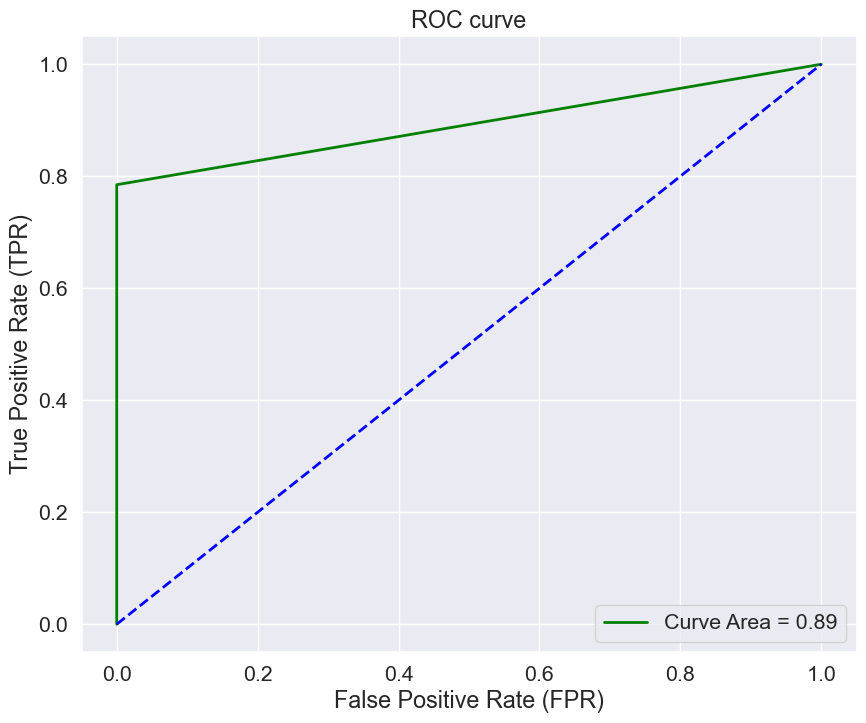

In [84]:
fpr, tpr, thr = roc_curve(y_test, pred)
auc = np.round(roc_auc_score(y_test, pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

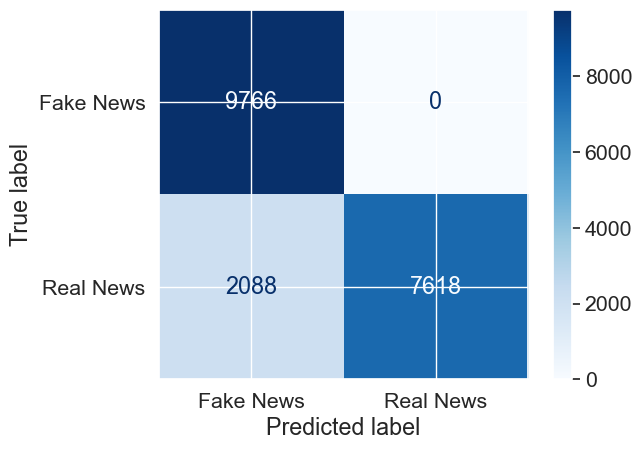

In [85]:
plot_confusion_matrix(knn, 
                      X_test, 
                      y_test, 
                      display_labels=["Fake News", "Real News"],
                      cmap='Blues')
plt.show()

In [86]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  9766
False Negatives =  2088
False Positives =  0
True Positives =  7618


### Decision Tree

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_aug, Y_aug, test_size=0.2, random_state=50)
X_test.shape

(19472, 27932)

In [88]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=50)

In [89]:
dpred = dtree.predict(X_train)

### Train Accuracy

In [90]:
accuracy = accuracy_score(y_train,dpred)
print(accuracy)

0.9999871603923784


In [91]:
from sklearn.model_selection import cross_val_score,cross_val_predict
dtc_acc=cross_val_score(dtree,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
dtc_proba=cross_val_predict(dtree,X_train,y_train,cv=5,method='predict_proba')

### Validation Accuracy

In [166]:
dtc_acc.mean()

0.9783139124396824

In [93]:
dpred = dtree.predict(X_test) 

### Test Accuracy

In [94]:
accuracy = accuracy_score(y_test,dpred)
print(accuracy)

0.9797144617912901


In [95]:
confusion_matrix_ = confusion_matrix(y_test, dpred)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, dpred))

confusion_matrix: 
 [[9646  120]
 [ 275 9431]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9766
           1       0.99      0.97      0.98      9706

    accuracy                           0.98     19472
   macro avg       0.98      0.98      0.98     19472
weighted avg       0.98      0.98      0.98     19472



In [96]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  9646
False Negatives =  275
False Positives =  120
True Positives =  9431


In [97]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.97
False Positive Rate =  0.01


### ROC Curve

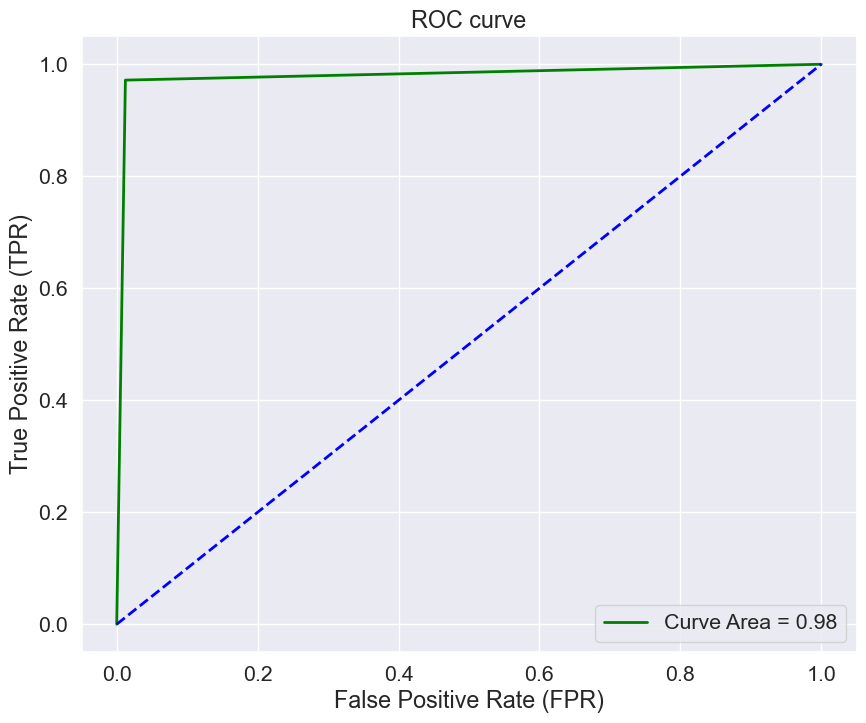

In [98]:
fpr, tpr, thr = roc_curve(y_test, dpred)
auc = np.round(roc_auc_score(y_test, dpred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

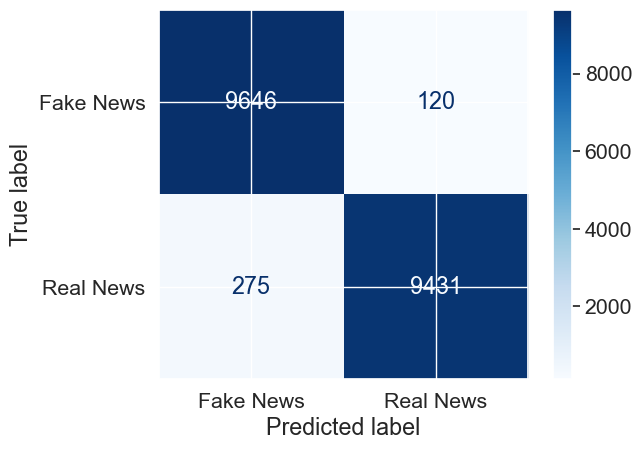

In [99]:
plot_confusion_matrix(dtree, 
                      X_test, 
                      y_test, 
                      display_labels=["Fake News", "Real News"],
                      cmap='Blues')
plt.show()

### RandomForestClassifier

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_aug, Y_aug, test_size=0.2, random_state=50)
X_test.shape

(19472, 27932)

In [101]:
from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(n_estimators=200)
#n_estimators=48, 83, 100, 120
rfc = RandomForestClassifier(random_state=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [102]:
rfc_pred = rfc.predict(X_train)

### Train Accuracy

In [103]:
accuracy = accuracy_score(y_train,rfc_pred)
print(accuracy)

0.9999871603923784


In [104]:
from sklearn.model_selection import cross_val_score,cross_val_predict
rfc_acc=cross_val_score(rfc,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
rfc_proba=cross_val_predict(rfc,X_train,y_train,cv=5,method='predict_proba')

### Validation Accuracy

In [167]:
rfc_acc.mean()

0.9943890901467697

In [106]:
rfc_pred = rfc.predict(X_test)

### Test Accuracy

In [107]:
accuracy = accuracy_score(y_test,rfc_pred)
print(accuracy)

0.9948644207066557


In [108]:
confusion_matrix_ = confusion_matrix(y_test, rfc_pred)

print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, rfc_pred))

confusion_matrix: 
 [[9703   63]
 [  37 9669]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9766
           1       0.99      1.00      0.99      9706

    accuracy                           0.99     19472
   macro avg       0.99      0.99      0.99     19472
weighted avg       0.99      0.99      0.99     19472



In [109]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  9703
False Negatives =  37
False Positives =  63
True Positives =  9669


In [110]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  1.0
False Positive Rate =  0.01


### ROC Curve

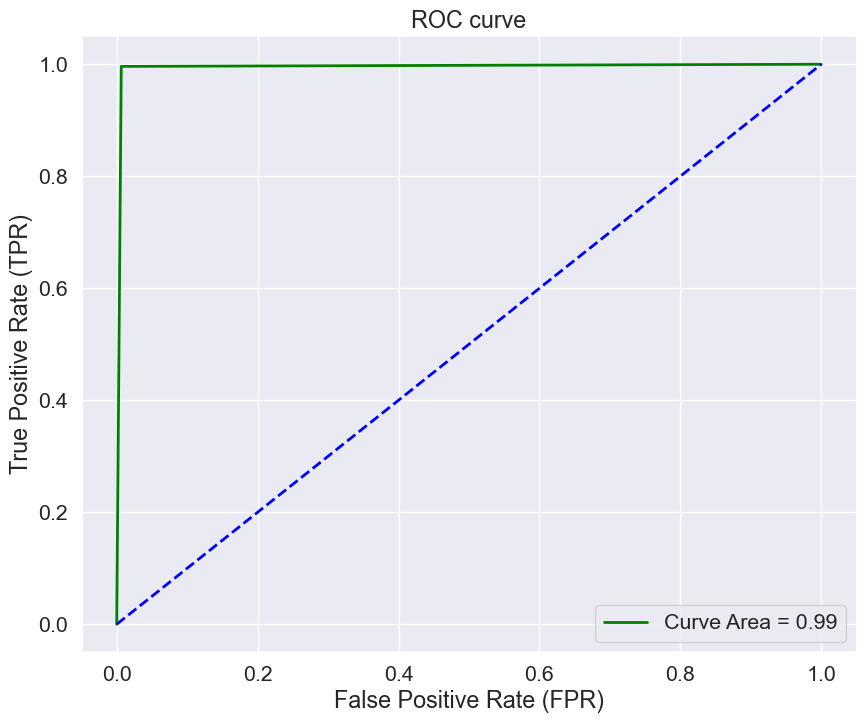

In [111]:
fpr, tpr, thr = roc_curve(y_test, rfc_pred)
auc = np.round(roc_auc_score(y_test, rfc_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

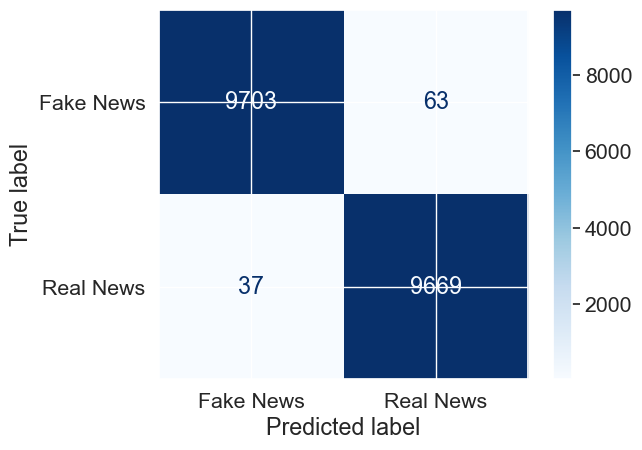

In [112]:
plot_confusion_matrix(rfc, 
                      X_test, 
                      y_test, 
                      display_labels=["Fake News", "Real News"],
                      cmap='Blues')
plt.show()

### GradientBoosting

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_aug, Y_aug, test_size=0.2, random_state=50)
X_test.shape

(19472, 27932)

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

GS = GradientBoostingClassifier(random_state=50)

In [138]:
GS.fit(X_train,y_train)

GradientBoostingClassifier(random_state=50)

In [139]:
GS_pred = GS.predict(X_train)

### Train Accuracy

In [140]:
accuracy = accuracy_score(y_train,GS_pred)
print(accuracy)

0.9679009809460223


In [141]:
from sklearn.model_selection import cross_val_score,cross_val_predict
GS_acc=cross_val_score(GS,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
GS_proba=cross_val_predict(GS,X_train,y_train,cv=5,method='predict_proba')

### Validation Accuracy

In [168]:
GS_acc.mean()

0.966000720314501

In [146]:
GS_pred = GS.predict(X_test)

### Test Accuracy

In [147]:
accuracy = accuracy_score(y_test,GS_pred)
print(accuracy)

0.9642563681183237


In [148]:
confusion_matrix_ = confusion_matrix(y_test, GS_pred)
print('confusion_matrix: \n', confusion_matrix_)

print(classification_report(y_test, GS_pred))

confusion_matrix: 
 [[9398  368]
 [ 328 9378]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      9766
           1       0.96      0.97      0.96      9706

    accuracy                           0.96     19472
   macro avg       0.96      0.96      0.96     19472
weighted avg       0.96      0.96      0.96     19472



In [149]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  9398
False Negatives =  328
False Positives =  368
True Positives =  9378


In [150]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.97
False Positive Rate =  0.04


### ROC Curve

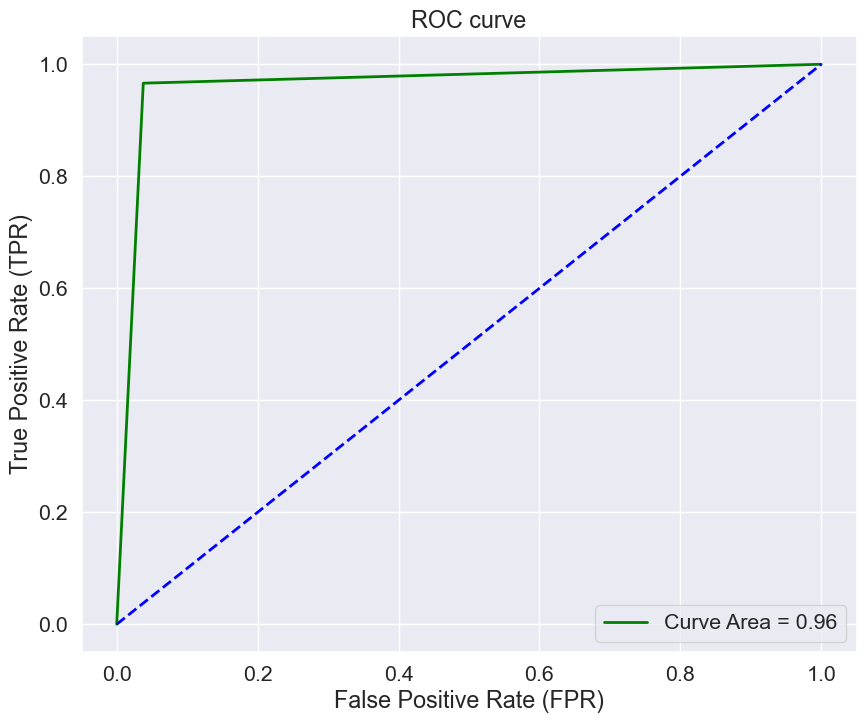

In [151]:
fpr, tpr, thr = roc_curve(y_test, GS_pred)
auc = np.round(roc_auc_score(y_test, GS_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

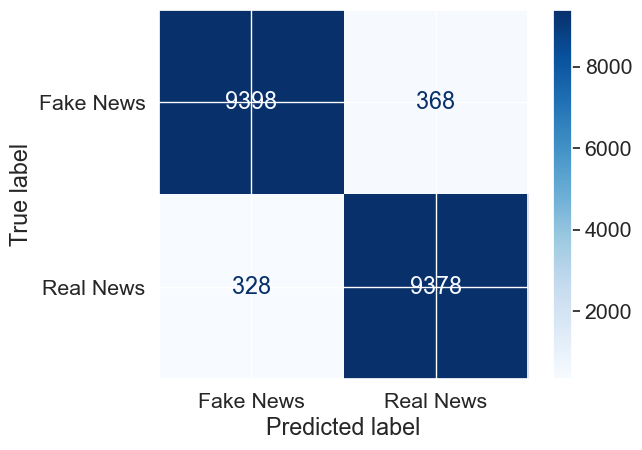

In [152]:
plot_confusion_matrix(GS, 
                      X_test, 
                      y_test, 
                      display_labels=["Fake News", "Real News"],
                      cmap='Blues')
plt.show()

### XGBoost Classifier

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_aug, Y_aug, test_size=0.2, random_state=50)
X_test.shape

(19472, 27932)

In [123]:
from xgboost import XGBClassifier

In [124]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=50, eval_metric="auc")

In [125]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=50,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
xgb_pred = xgb_model.predict(X_train)

### Train Accuracy

In [127]:
accuracy = accuracy_score(y_train,xgb_pred)
print(accuracy)

0.9984078886549227


In [128]:
from sklearn.model_selection import cross_val_score,cross_val_predict
xgb_acc=cross_val_score(xgb_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
xgb_proba=cross_val_predict(xgb_model,X_train,y_train,cv=5,method='predict_proba')

### Validation Accuracy

In [169]:
xgb_acc.mean()

0.994003900269249

In [154]:
xgb_pred = xgb_model.predict(X_test)

### Test Accuracy

In [155]:
accuracy = accuracy_score(y_test,xgb_pred)
print(accuracy)

0.9929642563681184


In [156]:
confusion_matrix_ = confusion_matrix(y_test, xgb_pred)
print('confusion_matrix: \n', confusion_matrix_)

print(classification_report(y_test, xgb_pred))

confusion_matrix: 
 [[9694   72]
 [  65 9641]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9766
           1       0.99      0.99      0.99      9706

    accuracy                           0.99     19472
   macro avg       0.99      0.99      0.99     19472
weighted avg       0.99      0.99      0.99     19472



In [157]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  9694
False Negatives =  65
False Positives =  72
True Positives =  9641


In [158]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.99
False Positive Rate =  0.01


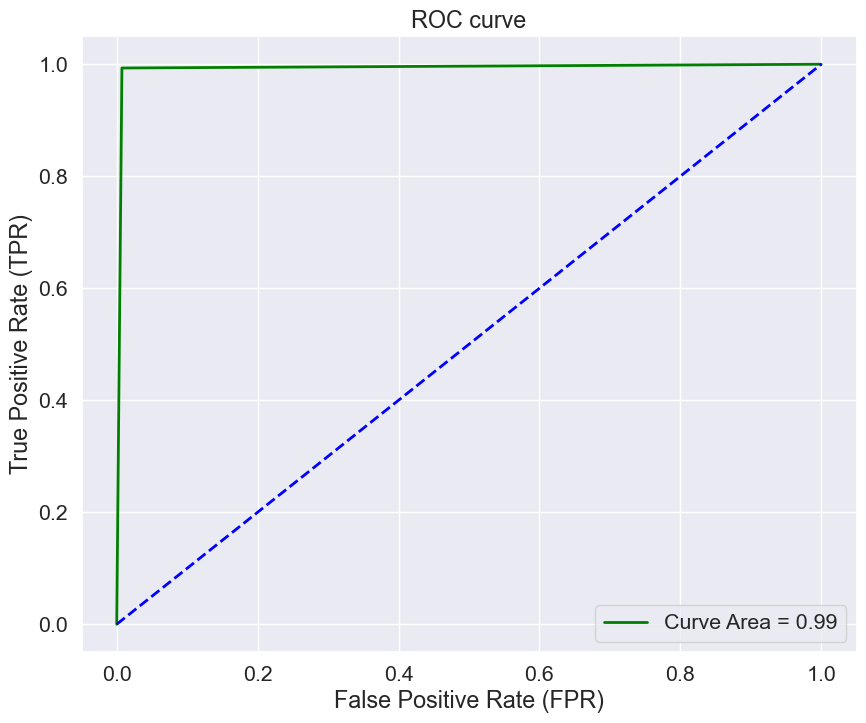

In [159]:
fpr, tpr, thr = roc_curve(y_test, xgb_pred)
auc = np.round(roc_auc_score(y_test, xgb_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

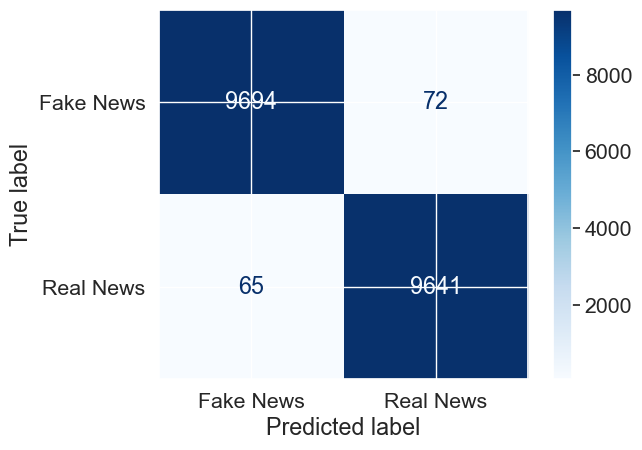

In [134]:
plot_confusion_matrix(xgb_model, 
                      X_test, 
                      y_test, 
                      display_labels=["Fake News", "Real News"],
                      cmap='Blues')
plt.show()

In [160]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state=50)))
models.append(('RFC', RandomForestClassifier(random_state=50)))
models.append(('GB', GradientBoostingClassifier(random_state=50)))
models.append(('XG Boost', XGBClassifier(objective="binary:logistic", random_state=50, eval_metric="auc")))

names = []
scores = []
rec = []
pre = []
f = []
roc = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(round((accuracy_score(y_test, y_pred)*100), 2))
    pre.append(round((precision_score(y_test,y_pred)*100), 2))
    rec.append(round((recall_score(y_test,y_pred)*100), 2))           
    f.append(round((f1_score(y_test,y_pred)*100), 2))          
    roc.append(round((roc_auc_score(y_test,y_pred)*100), 2))
    
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuracy': scores, 'Precision': pre, 'Recall': rec, "F1-Score": f, "ROC Score": roc})
tr_split

,Name,Accuracy,Precision,Recall,F1-Score,ROC Score
0,KNN,89.28,100.00,78.49,87.95,89.24
1,DTC,97.97,98.74,97.17,97.95,97.97
2,RFC,99.49,99.35,99.62,99.49,99.49
3,GB,96.43,96.22,96.62,96.42,96.43
4,XG Boost,99.30,99.26,99.33,99.29,99.30
